# 导入数据

In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv('工业设备模拟数据.csv')
df.head()

,温度,电压,压力,振动值,转速,是否异常
0,79.97,212.92,2.18,0.75,1181,0
1,73.62,217.90,2.28,0.83,1380,0
2,81.48,218.29,2.54,1.22,1501,0
3,90.23,215.99,2.53,1.18,1509,1
4,72.66,219.19,1.31,0.99,1409,0


# 拆分训练集和测试集

In [2]:
from sklearn.model_selection import train_test_split
# 分特征和标签
x = df[['温度','电压','压力','振动值','转速']]
y = df['是否异常']
# 拆分训练集和测试集（80%训练,20%测试）
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print('训练集大小:',x_train.shape)
print('测试集大小：',x_test.shape)

训练集大小: (80, 5)
测试集大小： (20, 5)


# 用逻辑回归模型(Logistic Regression)

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report
# 创建逻辑回归模型
model = LogisticRegression()
# 用训练集训练模型
model.fit(x_train, y_train)
# 用测试集做预测
y_pred = model.predict(x_test)
# 输出模型预测准确率
acc = accuracy_score(y_test, y_pred)
print(f'模型准确率:{acc:.2f}')
# 输出更详细点的分类评估报告
print('\n分类报告')
print(classification_report(y_test, y_pred))

模型准确率:0.90

分类报告
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        18
           1       0.00      0.00      0.00         2

    accuracy                           0.90        20
   macro avg       0.45      0.50      0.47        20
weighted avg       0.81      0.90      0.85        20



D:\py\Python项目\01-python基础\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\py\Python项目\01-python基础\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
D:\py\Python项目\01-python基础\.venv\Lib\site-packages\sklearn\metrics\_clas

# 可视化模型结果（混淆矩阵）

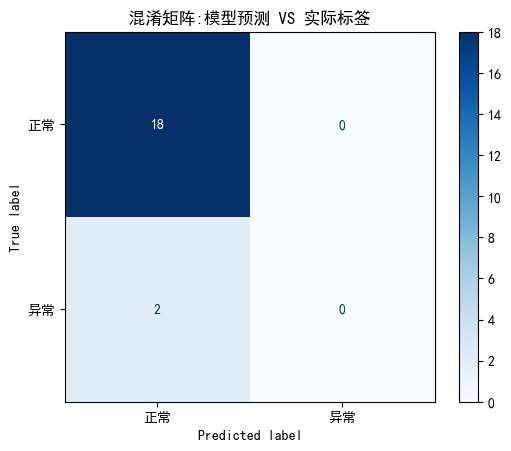

In [18]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.sans-serif'] = 'SimHei'
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
# 生成混淆矩阵
cm = confusion_matrix(y_test, y_pred)
# 可视化混淆矩阵
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['正常','异常'])
disp.plot(cmap=plt.cm.Blues)
plt.title('混淆矩阵:模型预测 VS 实际标签')
plt.show()

# 用随机森林模型（Random Forest）

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
# 创建模型
rf_model = RandomForestClassifier(random_state=42,class_weight='balanced')
# 训练模型
rf_model.fit(x_train, y_train)
# 测试集预测
y_pred_rf = rf_model.predict(x_test)
# 输出模型准确率
acc_rf = accuracy_score(y_test, y_pred_rf)
print(f'随机森林模型准确率：{acc_rf:.2f}')
print('\n分类报告')
print(classification_report(y_test, y_pred_rf))

随机森林模型准确率：0.90

分类报告
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        18
           1       0.00      0.00      0.00         2

    accuracy                           0.90        20
   macro avg       0.45      0.50      0.47        20
weighted avg       0.81      0.90      0.85        20



D:\py\Python项目\01-python基础\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
D:\py\Python项目\01-python基础\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
D:\py\Python项目\01-python基础\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


# 可视化模型结果

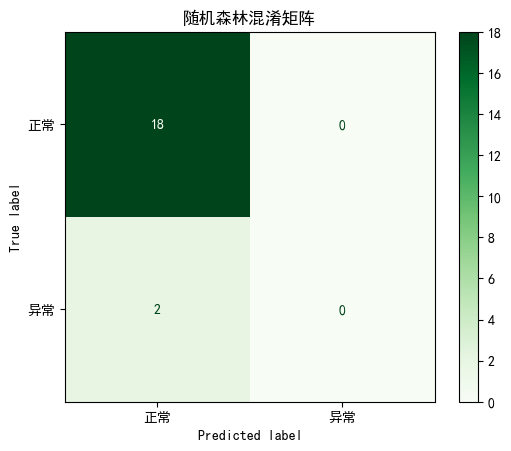

In [22]:
cm_rf =confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf,display_labels=['正常','异常'])
disp_rf.plot(cmap=plt.cm.Greens)
plt.title('随机森林混淆矩阵')
plt.show()

# 获取并可视化特征重要性

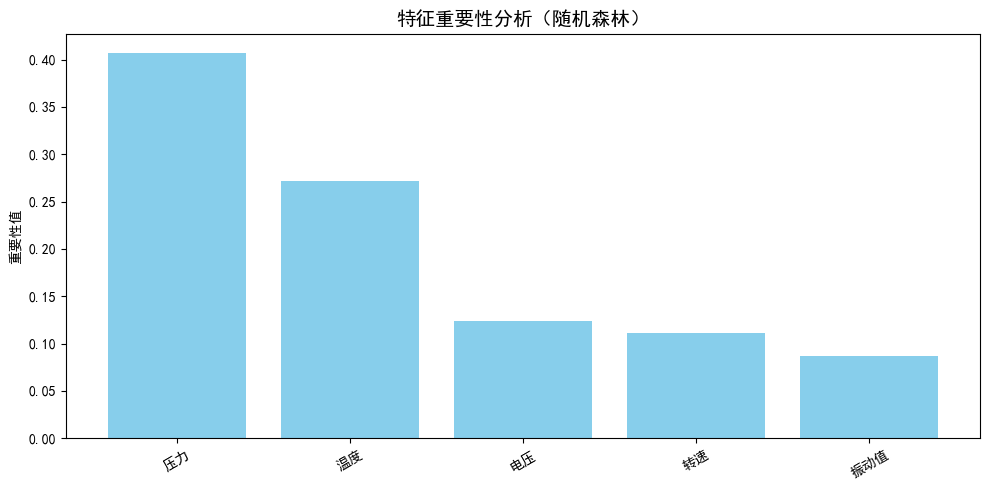

In [23]:
# 获取特征名称和对应的重要性值
feature_names = x_train.columns
importances = rf_model.feature_importances_
# 按重要性从高到低排序
indices = np.argsort(importances)[::-1]
# 可视化
plt.figure(figsize=(10,5))
plt.title('特征重要性分析（随机森林）',fontsize=14)
plt.bar(range(len(importances)), importances[indices], color='skyblue')
plt.xticks(range(len(importances)), feature_names[indices], rotation=30)
plt.ylabel('重要性值')
plt.tight_layout()
plt.show()